In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load data
data = pd.read_csv('diabetes.csv')
data = data.sample(frac=1) #get random sample


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1069 to 1235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 156.2 KB


In [6]:
data["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
train = data.iloc[:1800,:]
test = data.iloc[1800:,:]

In [5]:
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 1500 to 638
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1800 non-null   int64  
 1   Glucose                   1800 non-null   int64  
 2   BloodPressure             1800 non-null   int64  
 3   SkinThickness             1800 non-null   int64  
 4   Insulin                   1800 non-null   int64  
 5   BMI                       1800 non-null   float64
 6   DiabetesPedigreeFunction  1800 non-null   float64
 7   Age                       1800 non-null   int64  
 8   Outcome                   1800 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.6 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 765 to 1809
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies 

In [8]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1069,7,168,88,42,321,38.2,0.787,40,1
1514,14,175,62,30,0,33.6,0.212,38,1
226,0,101,76,0,0,35.7,0.198,26,0
1590,2,167,44,30,140,52.7,0.452,28,0
476,2,105,80,45,191,33.7,0.711,29,1


In [9]:
train.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,3.686667,121.328889,69.020556,20.830000,80.202222,32.190444,0.469203,33.022778,0.342222
std,3.289385,32.145266,19.398719,16.101919,112.029359,8.168530,0.323385,11.696031,0.474585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.300000,0.370000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.855000,119.865000,70.270000,21.88000,80.720000,32.216000,0.486475,33.700000,0.340000
std,3.457419,31.418824,17.182353,16.12469,103.489963,8.000367,0.325456,12.585387,0.474898
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.00000,0.000000,27.175000,0.259500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,24.00000,47.500000,32.100000,0.405000,29.000000,0.000000
75%,6.000000,135.750000,80.000000,33.00000,130.000000,37.175000,0.603250,41.000000,1.000000
max,17.000000,197.000000,108.000000,99.00000,600.000000,53.200000,2.137000,81.000000,1.000000


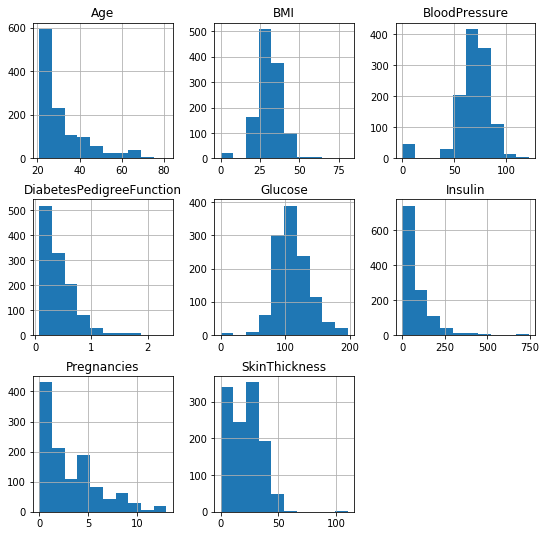

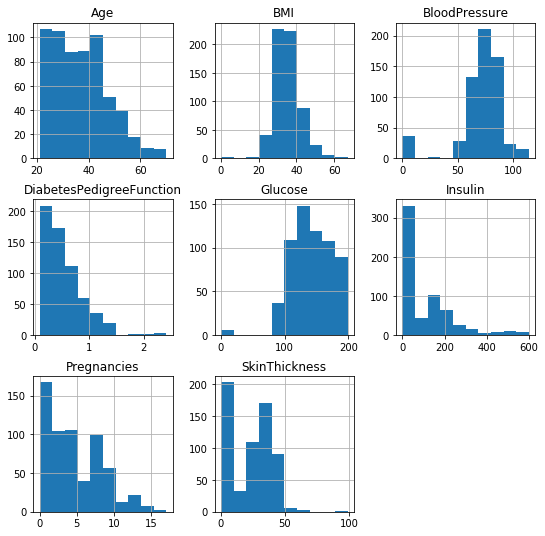

In [41]:
train.groupby("Outcome").hist(figsize=(9, 9))
plt.savefig('GroupBy_Outcome.png', bbox_inches='tight')

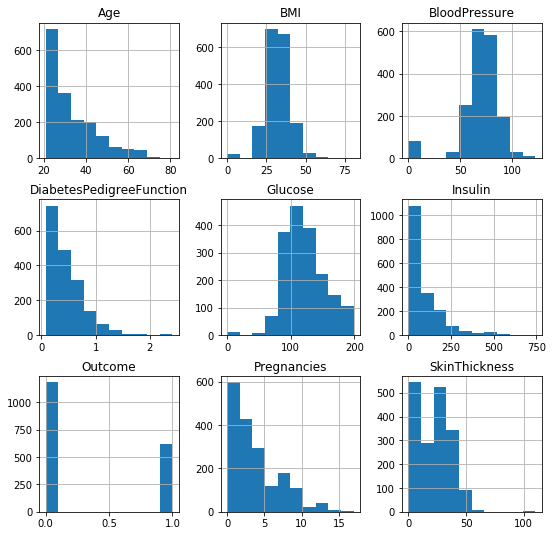

In [42]:
train.hist(figsize=(9, 9))
plt.savefig('Train_data_Histogram.png', bbox_inches='tight')

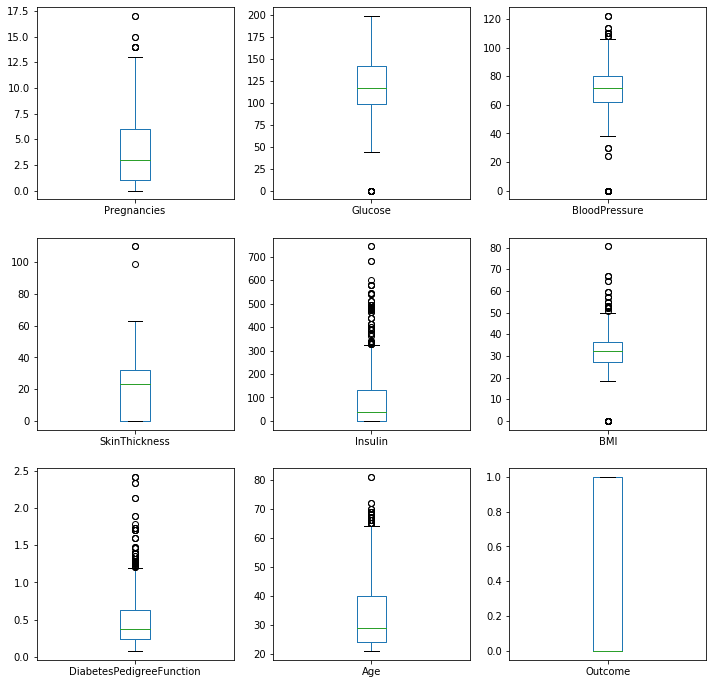

In [43]:
train.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = (12, 12));
plt.savefig('Box_plot.png', bbox_inches='tight')

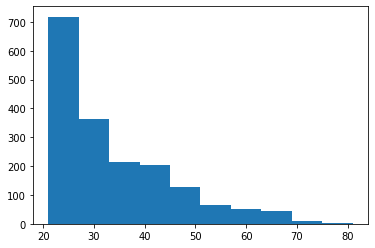

In [44]:
plt.hist(train['Age'],bins=10)
plt.savefig('Age_bins.png', bbox_inches='tight')

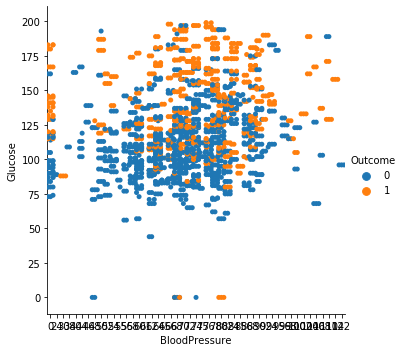

In [46]:
sns.catplot(x="BloodPressure", y="Glucose", hue="Outcome", kind="swarm", data= train);
plt.savefig("BP_vs_Glucose.png")

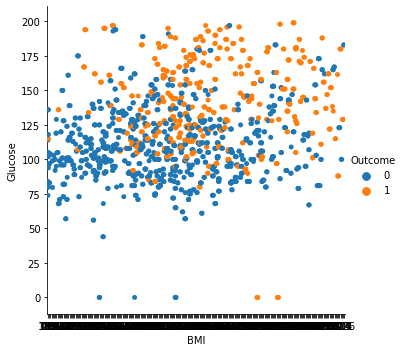

In [47]:
sns.catplot(x="BMI", y="Glucose", hue="Outcome", kind="swarm", data= train);
plt.savefig("BMI_vs_Glucose.png")

In [15]:
series, intervals = pd.cut(train['Age'],bins=4,precision=0,include_lowest=True,retbins=True)
age_output = train[['Age','Outcome']]
age_output['Age'] = series
age_output.groupby('Age').mean()

C:\Users\Aditya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Outcome
Age,
"(20.0, 36.0]",0.268755
"(36.0, 51.0]",0.521127
"(51.0, 66.0]",0.467626
"(66.0, 81.0]",0.136364


In [16]:
age_output.groupby('Age').count()

,Outcome
Age,
"(20.0, 36.0]",1213
"(36.0, 51.0]",426
"(51.0, 66.0]",139
"(66.0, 81.0]",22


In [17]:
series, intervals = pd.cut(train['Glucose'],bins=3,precision=0,include_lowest=True,retbins=True)
chol_output = train[['Glucose','Outcome']]
chol_output['Glucose'] = series
chol_output.groupby('Glucose').mean()

C:\Users\Aditya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Outcome
Glucose,
"(-1.0, 66.0]",0.214286
"(66.0, 133.0]",0.207101
"(133.0, 199.0]",0.619694


In [19]:
p_output = train.groupby('Pregnancies').count()
print(p_output['Outcome'])

Pregnancies
0     273
1     324
2     254
3     173
4     167
5     128
6     121
7      97
8      82
9      63
10     47
11     20
12     21
13     21
14      5
15      2
17      2
Name: Outcome, dtype: int64


In [20]:
p_output = train.groupby('Pregnancies').count()
print(p_output['Outcome'])

Pregnancies
0     273
1     324
2     254
3     173
4     167
5     128
6     121
7      97
8      82
9      63
10     47
11     20
12     21
13     21
14      5
15      2
17      2
Name: Outcome, dtype: int64


In [21]:
train[train.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
342,1,0,68,35,0,32.0,0.389,22,0
75,1,0,48,20,0,24.7,0.140,22,0
812,1,0,68,35,0,32.0,0.389,22,0
1602,5,0,80,32,0,41.0,0.346,37,1
819,5,0,80,32,0,41.0,0.346,37,1
972,6,0,68,41,0,39.0,0.727,41,1
1595,1,0,68,35,0,32.0,0.389,22,0
1896,1,0,48,20,0,24.7,0.140,22,0
1340,1,0,74,20,23,27.7,0.299,21,0
349,5,0,80,32,0,41.0,0.346,37,1


In [22]:
train[train.Glucose==0].count()

Pregnancies                 12
Glucose                     12
BloodPressure               12
SkinThickness               12
Insulin                     12
BMI                         12
DiabetesPedigreeFunction    12
Age                         12
Outcome                     12
dtype: int64

In [23]:
#fill these with mean
mean_glucose=train[train.Glucose!=0].mean()
print(mean_glucose["Glucose"])

122.14317673378076


In [24]:
glucose_0_removed_df=train.copy()

In [25]:
glucose_0_removed_df.loc[glucose_0_removed_df.Glucose==0,"Glucose"]=mean_glucose["Glucose"]

In [26]:
glucose_0_removed_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,3.686667,122.143177,69.020556,20.830000,80.202222,32.190444,0.469203,33.022778,0.342222
std,3.289385,30.569046,19.398719,16.101919,112.029359,8.168530,0.323385,11.696031,0.474585
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.242500,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,37.000000,32.300000,0.370000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [29]:
train[(train.BloodPressure != 0) & (train.BMI != 0) & (train.Glucose != 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1500,2,83,66,23,50,32.2,0.497,22,0
48,7,103,66,32,0,39.1,0.344,31,1
486,1,139,62,41,480,40.7,0.536,21,0
1117,10,162,84,0,0,27.7,0.182,54,0
1407,1,111,86,19,0,30.1,0.143,23,0
...,...,...,...,...,...,...,...,...,...
646,1,167,74,17,144,23.4,0.447,33,1
1094,2,94,76,18,66,31.6,0.649,23,0
1926,1,126,56,29,152,28.7,0.801,21,0
1826,2,99,60,17,160,36.6,0.453,21,0


In [27]:
d_train=train[(train.BloodPressure != 0) & (train.BMI != 0) & (train.Glucose != 0)]

In [28]:
d_train  #removing rows where BP,BMI and Glucose are zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1069,7,168,88,42,321,38.2,0.787,40,1
1514,14,175,62,30,0,33.6,0.212,38,1
226,0,101,76,0,0,35.7,0.198,26,0
1590,2,167,44,30,140,52.7,0.452,28,0
476,2,105,80,45,191,33.7,0.711,29,1
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
1292,2,96,68,13,49,21.1,0.647,26,0
1092,13,104,72,0,0,31.2,0.465,38,1
375,12,140,82,43,325,39.2,0.528,58,1


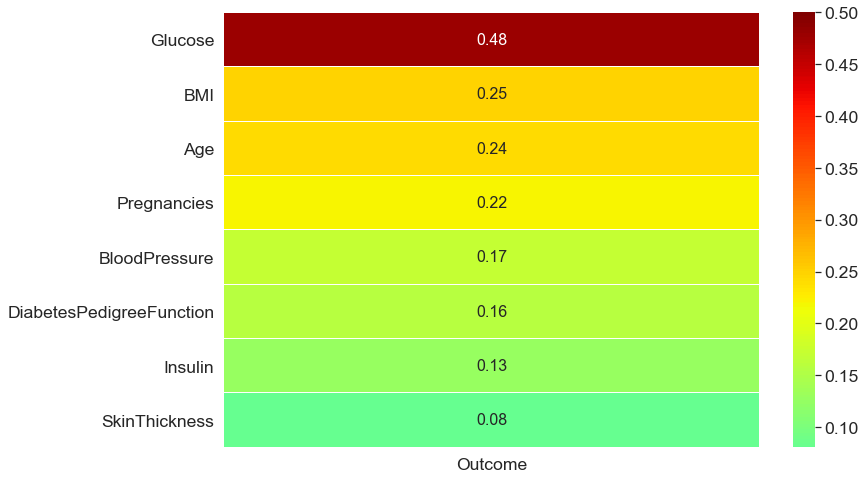

In [51]:
cor = d_train.corr().iloc[ : , -1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.savefig("heatMap.png")
plt.show()

In [35]:
x_train=d_train.iloc[:,:8]
y_train=d_train.iloc[:,8:]
x_test=test.iloc[:,:8]
y_test=test.iloc[:,8:]
y_train.head()

,Outcome
1069,1
1514,1
226,0
1590,0
476,1


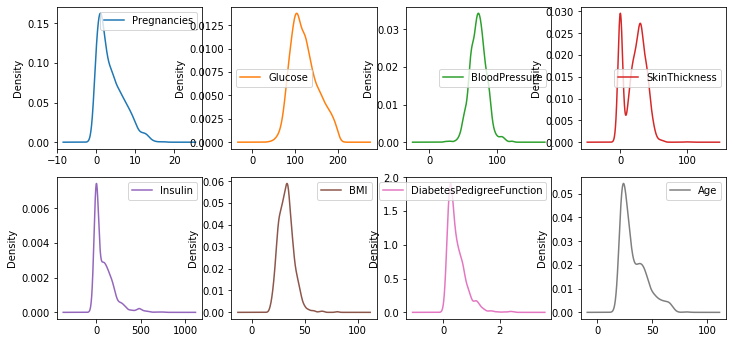

In [48]:
x_train.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));
plt.savefig('Density.png', bbox_inches='tight')

In [39]:
x_train1=(x_train-x_train.mean())/x_train.std()
x_train1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1069,0.991572,1.481950,1.269062,1.307066,2.079425,0.768278,0.977690,0.583240
1514,3.116369,1.708973,-0.849085,0.537959,-0.745901,0.129446,-0.801052,0.412514
226,-1.133225,-0.690979,0.291455,-1.384809,-0.745901,0.421086,-0.844360,-0.611846
1590,-0.526140,1.449519,-2.315495,0.537959,0.486328,2.781986,-0.058621,-0.441119
476,-0.526140,-0.561251,0.617324,1.499343,0.935212,0.143334,0.742586,-0.355756


In [40]:
import re
import math
from typing import Set,NamedTuple,Dict,Iterable,Tuple
from collections import defaultdict

class Message(NamedTuple):
    text: str
    is_spam: bool


def tokenize(text: str) -> Set[str]:

    text = text.lower()
    all_words = re.findall("[a-z0-9']+",text)
    return set(all_words)

class NaiveBayesClassifier:
    def __init__(self,k: float=0.5) -> None:
        self.k = k
        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str,int] = defaultdict(int)
        self.token_ham_counts: Dict[str,int] = defaultdict(int)
        self.spam_messages = 0
        self.ham_messages = 0

    def train(self,messages: Iterable[Message]) -> None:

        for message in messages:

            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

    def _probablities(self,token:str) -> Tuple[float,float]:

        p_spam = (self.token_spam_counts[token]+self.k)/(self.spam_messages + 2 * self.k)
        p_ham = (self.token_ham_counts[token] + self.k)/(self.ham_messages + 2 * self.k)
        return p_spam,p_ham

    def predict(self,text: str):

        text_tokens = tokenize(text)
        log_prob_spam = log_prob_ham = 0.0

        for token in self.tokens:
            prob_if_spam,prob_if_ham = self._probablities(token)

            if token in text_tokens:
                log_prob_ham += math.log(prob_if_ham)
                log_prob_spam += math.log(prob_if_spam)
            else:
                log_prob_ham += math.log(1 - prob_if_ham)
                log_prob_spam += math.log(1 - prob_if_spam)

        prob_if_spam = math.exp(log_prob_spam)
        prob_if_ham = math.exp(log_prob_ham)
        return prob_if_spam/(prob_if_ham + prob_if_spam)


